In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [11]:
data = pd.read_csv("/content/network-security-white-labelling/resources/amazon/amazon_smart_wifi_plug_products_dataset.csv")
data.columns = ['product_id', 'product_name', 'long_description', 'brand', 'app_name', 'image_url',
       'url']
df = data[['product_id', 'product_name', 'brand', 'long_description',]]
df = df[df['brand']!="None"]

In [12]:
# 1. Top Products and Brands
top_n_products = df['product_name'].value_counts().head(5)
top_n_brands = df['brand'].value_counts().head(5)
print("\n Top Products:")
print(top_n_products)
print("\n Top Brands:")
print(top_n_brands)


 Top Products:
ELEGRP Outdoor Waterproof Individually Assistant      5
Socket Insulated Control Function 100%E2%80%91240V    4
Outlets Socket Double Control 220%E2%80%91250V        3
Socket Outlet Google Remote Control                   2
BN LINK Compatible Control Function Required          2
Name: product_name, dtype: int64

 Top Brands:
meross       14
BN-LINK      14
ELEGRP       13
TREATLIFE    11
Walfront     10
Name: brand, dtype: int64


In [13]:
#2. Word Clouds
def create_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

product_names_text = ' '.join(df['product_name'])
brand_names_text = ' '.join(str(df['brand']))


4. Word Cloud for Product Names:


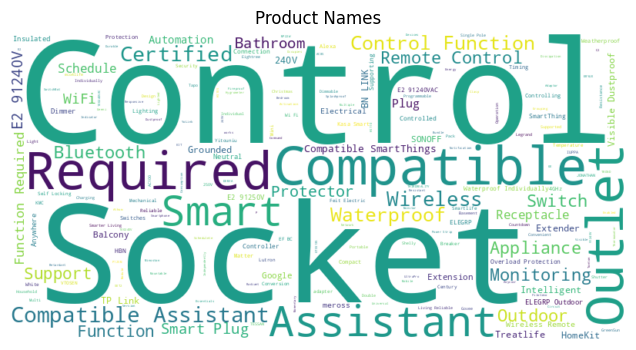

In [14]:
print("\n4. Word Cloud for Product Names:")
create_word_cloud(product_names_text, "Product Names")


4. Word Cloud for Brand Names:


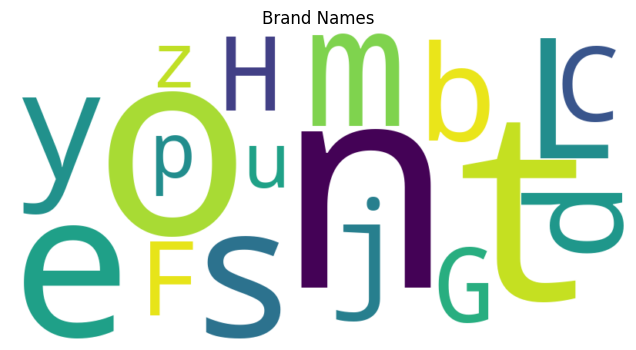

In [15]:
print("\n4. Word Cloud for Brand Names:")
create_word_cloud(brand_names_text, "Brand Names")

In [29]:
duplicate_product_names = df[df['product_name'].duplicated(keep=False)]['product_name']
print("\n6. Duplicate Product Names:")

for product in duplicate_product_names:
  print(product, "\n")


6. Duplicate Product Names:
SONOFF Monitoring Certified Assistant Supporting 

Smart Compatible Function Supports Required 

HBN Grounded Wireless Compatible Assistant 

HBN Grounded Wireless Compatible Assistant 

Outlet Compatible Smartthings Control Function 

Outlet Compatible Smartthings Control Function 

BN LINK Compatible Control Function Required 

Filotimo Assistant Controller Monitoring Activation 

SONOFF Monitoring Certified Assistant Supporting 

Yitouniu AC85 250V Temperature Consumption Monitoring 

ELEGRP Outdoor Waterproof Individually Assistant 

BN LINK Compatible Control Function Required 

Meross Smart Plug Support Matter 

Smart Compatible Function Supports Required 

ELEGRP Outdoor Waterproof Individually Assistant 

Socket Insulated Control Function 100%E2%80%91240V 

Socket Insulated Control Function 100%E2%80%91240V 

ELEGRP Outdoor Waterproof Individually Assistant 

ELEGRP Outdoor Waterproof Individually Assistant 

Lutron Weatherproof Compatible Assistant

In [17]:
# Total Brands having similar product names with different Brands
brand_per_product = df.groupby('product_name')['brand'].unique()
duplicate_product_names = brand_per_product[brand_per_product.apply(len) > 1]
print(len(duplicate_product_names))

3


In [18]:
# Product name that has been use by most of the brands
duplicate_product_names.to_frame()


,brand
product_name,
Outlets Socket Double Control 220%E2%80%91250V,"[Jauarta, Boxwizard]"
Socket Insulated Control Function 100%E2%80%91240V,"[Hyuduo, LiebeWH, Kadimendium]"
Socket Visible Dustproof Waterproof Bathroom,"[Zudoo, Zerodis]"


In [20]:
# Top brands that hame most of their product name common with other brands
n = []
for data in duplicate_product_names:
  n.extend(data)
df_n = pd.DataFrame({"brand":n})
df_n.value_counts().head(6)

brand      
Boxwizard      1
Hyuduo         1
Jauarta        1
Kadimendium    1
LiebeWH        1
Zerodis        1
dtype: int64